# pandas, numpy, email and messaging, naive bayes

we'll study this in two steps

1. importing libraries of EDA 
2. importing libraries for model building and training

In [3]:
# importing necessary libraries for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Khurana_Kunal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
# importing libraries for model building and training

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
 
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("E:\machine learning projects\spam_ham_dataset.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [9]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [10]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [11]:
data.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [13]:
data["Spam"] = data ["Category"].apply(lambda x:1 if x=='spam' else 0)

data.head()

KeyError: 'Category'

In [15]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [16]:
data.shape

(5171, 4)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


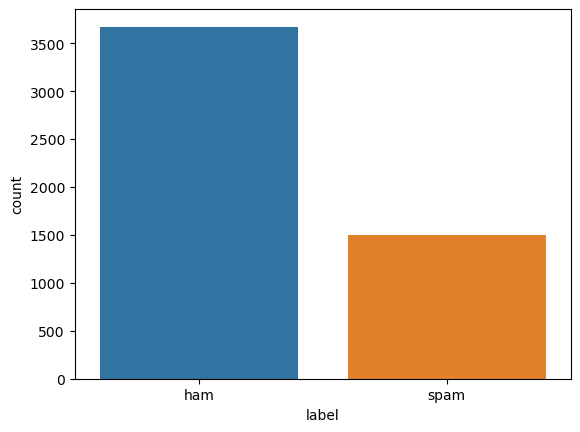

In [19]:
sns.countplot(x ='label', data= data)
plt.show()

#### inference = samples of ham are much more than samples of spam 
1. data is imbalanced

In [22]:
# downloading to balance to dataset

ham_msg = data[data.spam == 0]
spam_msg = data[data.spam == 1]
ham_msg = ham_msg.sample (n= len (spam_msg), random_state = 42)

AttributeError: 'DataFrame' object has no attribute 'spam'